# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 1.6 Implement the solution for $\mathbf{w}$.

In [ ]:
x1, y1 = 0, 0
x2, y2 = 2.0, 2.0

X = np.array([[1.0, x1], [1.0, x2]])
y = np.array([y1, y2])
w = np.linalg.inv(X) @ y

print("w =", w)

w = [0. 1.]


## 2.1 Plot $y = -3x^2 + 72x + 70$.

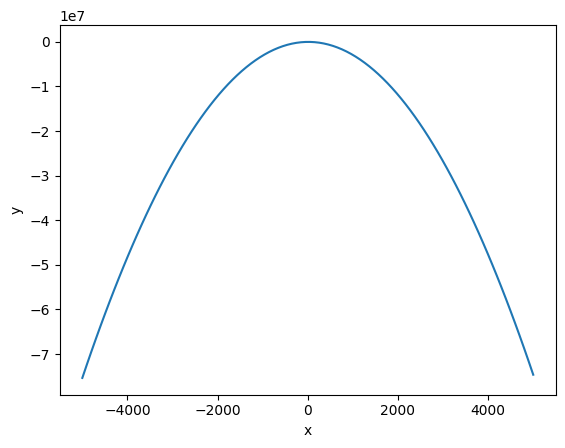

In [15]:
x = np.linspace(-5000, 5000, 100)
y = -3*x**2 + 72*x + 70

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 2.3 Plot $f(x_1, x_2)$.

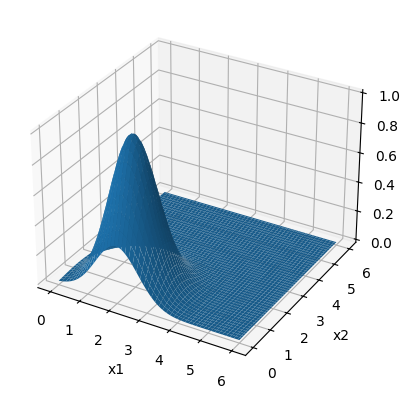

In [31]:
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 6, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = np.exp(-((X1 - 2)**2 + (X2 - 1)**2))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X1, X2, Y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

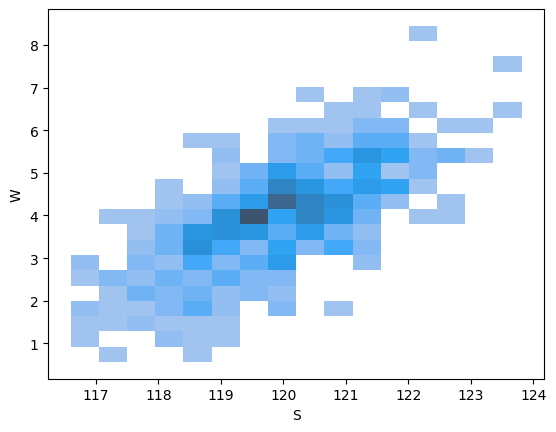

In [37]:
mean = np.array([120, 4])
cov = np.array([[1.5, 1.0], [1.0, 1.5]])
rv = mvn(mean, cov)
samples = rv.rvs(size=500)

S = samples[:, 0]
W = samples[:, 1]
df = pd.DataFrame({"S": S, "W": W})
sns.histplot(data=df, x="S", y="W")
plt.show()

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

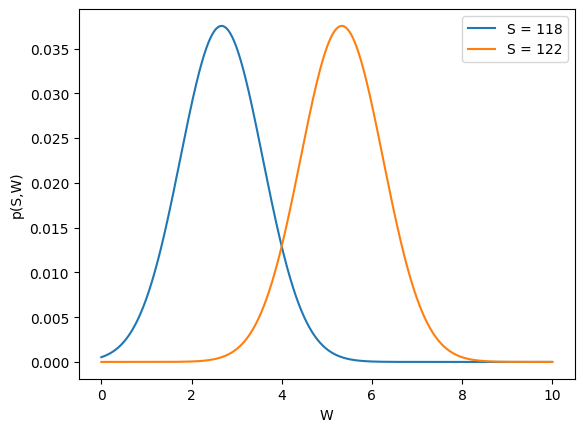

In [45]:
W = np.linspace(0, 10, 1001)

points = np.ones((len(W), 2))
points[:, 0] = 118
points[:, 1] = W
pdf_118 = rv.pdf(points)

points[:, 0] = 122
pdf_122 = rv.pdf(points)

plt.plot(W, pdf_118)
plt.plot(W, pdf_122)
plt.xlabel("W")
plt.ylabel("p(S,W)")
plt.legend(["S = 118", "S = 122"])
plt.show()

## 3.5(a) Function to simulate draws from $T^{*}$.

In [54]:
def T_star_draws():
    N = np.sum(np.random.poisson(3, size=24))

    samples = rv.rvs(size=N)
    S = samples[:, 0]
    W = samples[:, 1]

    eps = np.random.normal(0, np.sqrt(5), size=N)

    T = 60 + 0.6*W + 0.2*S + eps
    return np.sum(T)

print(T_star_draws())

6220.934977618452


## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [58]:
samples = np.array([T_star_draws() for _ in range(1000)])

print("mean(T*) = ", np.mean(samples))
print("std(T*) = ", np.std(samples))

mean(T*) =  6219.681731090076
std(T*) =  739.3996458730381


# 4.1: Examining the Data

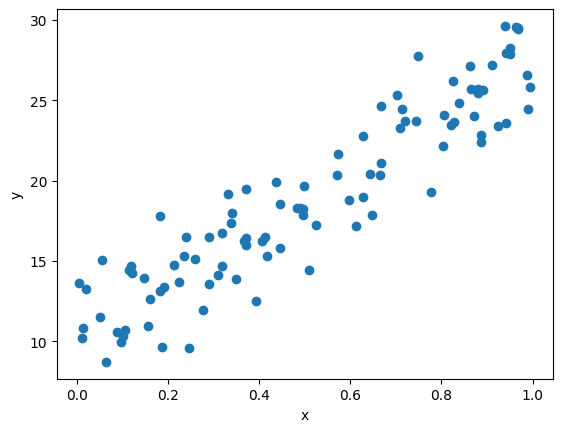

In [64]:
data = pd.read_csv("data/points.csv").values
x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 4.2: Adding the Intercept/Bias Term

In [90]:
intercept = np.ones((x.shape[0], 1))
X = np.hstack([intercept, x[:, None]])

print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (100, 2)
y.shape:  (100,)


## 4.4: Implementing the LinearRegression Class

In [97]:
# Steve's solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        self.w = (np.linalg.inv(X.T @ X)) @ X.T @ y[:, None]

    def predict(self, X):
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ self.w

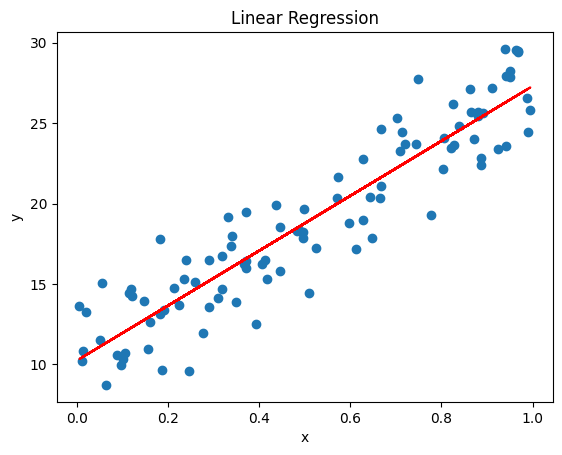

In [ ]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 4.5 MSE Computation

In [109]:
mse = np.mean((y[:, None] - y_pred) ** 2)
print(mse)

4.439331220193985
